In [5]:
import mnist_data_loader
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

## Load data

Extracting ../../DATA/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../DATA/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../DATA/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../DATA/MNIST_data/t10k-labels-idx1-ubyte.gz
Training dataset size: 12049
Test dataset size: 1968
3


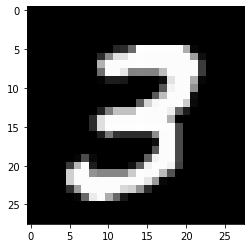

In [6]:
mnist_dataset = mnist_data_loader.read_data_sets("../../DATA/MNIST_data", one_hot=False)
# training dataset
train_set = mnist_dataset.train
# test dataset
test_set = mnist_dataset.test
print("Training dataset size:" , train_set.num_examples)
print("Test dataset size:" , test_set.num_examples)

# visualization
example_id = 0
image = train_set.images[example_id] # shape = 784 (28*28)
label = train_set.labels[example_id] # shape = 1
print(label)
plt.imshow(np.reshape(image,[28,28]),cmap="gray")
plt.show()

## Define Model

In [30]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, n_parameters):
        super(LogisticRegressionModel, self).__init__()
        self.n_parameters = n_parameters
        # define weights
        self.linear = nn.Linear(n_parameters, 10)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, inputs):
        outputs = self.sigmoid(self.linear(inputs))
        return outputs

## Training

[Train] epoch: 0 | train_step: 0 | train_loss: 2.30476 | train_acc: 0.000
[Test] test_step: 245 | test_acc: 0.247
[Train] epoch: 0 | train_step: 10 | train_loss: 1.97074 | train_acc: 0.625
[Train] epoch: 0 | train_step: 20 | train_loss: 1.80736 | train_acc: 0.875
[Train] epoch: 0 | train_step: 30 | train_loss: 1.72131 | train_acc: 1.000
[Train] epoch: 0 | train_step: 40 | train_loss: 1.66751 | train_acc: 0.875
[Train] epoch: 0 | train_step: 50 | train_loss: 1.63658 | train_acc: 0.875
[Train] epoch: 0 | train_step: 60 | train_loss: 1.61238 | train_acc: 1.000
[Train] epoch: 0 | train_step: 70 | train_loss: 1.63311 | train_acc: 0.875
[Train] epoch: 0 | train_step: 80 | train_loss: 1.57817 | train_acc: 1.000
[Train] epoch: 0 | train_step: 90 | train_loss: 1.58791 | train_acc: 1.000
[Train] epoch: 0 | train_step: 100 | train_loss: 1.58737 | train_acc: 1.000
[Test] test_step: 245 | test_acc: 0.987
[Train] epoch: 0 | train_step: 110 | train_loss: 1.56557 | train_acc: 1.000
[Train] epoch: 0 | 

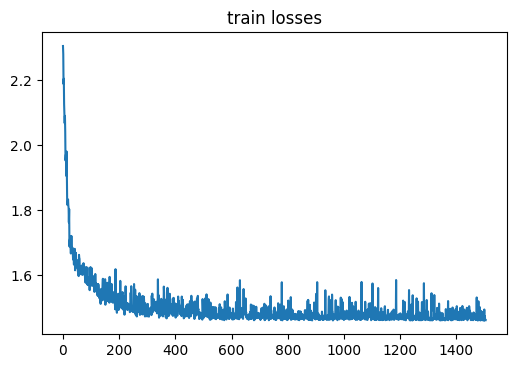

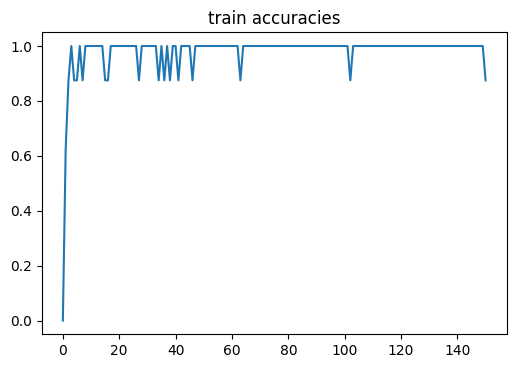

In [44]:
# get model
model = LogisticRegressionModel(n_parameters=784)
# loss_function = nn.NLLLoss()
loss_function = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 8
max_epoch = 1
eval_steps = 10
test_steps = 100
train_losses = []
train_accs  = []
for epoch in range(0, max_epoch):
    iter_per_batch = train_set.num_examples // batch_size
    for train_step, batch_id in enumerate(range(0, iter_per_batch)):
        # get the data of next minibatch (have been shuffled)
        optimizer.zero_grad()
        batch = train_set.next_batch(batch_size)
        inputs, label = batch # inputs: np.array with shape of (bsz, 784); label: int
        inputs = torch.FloatTensor(inputs)
        label = torch.LongTensor(label)
        # prediction
        outputs = model(inputs)
        # calculate the loss (and accuracy)
        loss = loss_function(outputs, label)
        train_losses.append(loss.item())
        # update weights
        loss.backward()
        optimizer.step()
        pred = torch.argmax(outputs, dim=-1)
        # evaluate
        if train_step % eval_steps == 0:
            train_acc = (pred==label).int().sum() / len(pred)
            train_accs.append(train_acc.item())
            print("[Train] epoch: %d | train_step: %d | train_loss: %.5f | train_acc: %.3f" % (epoch, train_step, loss, train_acc))
        # test
        if train_step % test_steps == 0:
            test_batches = test_set.num_examples // batch_size
            test_tp, test_total = 0, 0
            for test_step, test_batch_id in enumerate(range(0, test_batches)):
                # get the data of next minibatch (have been shuffled)
                batch = test_set.next_batch(batch_size)
                inputs, label = batch # inputs: np.array with shape of (bsz, 784); label: int
                inputs = torch.FloatTensor(inputs)
                label = torch.LongTensor(label)
                # prediction
                with torch.no_grad():
                    outputs = model(inputs)
                pred = torch.argmax(outputs, dim=-1)
                test_tp +=  (pred==label).int().sum()
                test_total += len(pred)
            test_acc = test_tp / test_total
            print("[Test] test_step: %d | test_acc: %.3f" % (test_step, test_acc))

# plot train losses curve
x_arr = np.arange(len(train_losses))
fig1 = plt.figure(dpi=100)
plt.title("train losses")
plt.plot(x_arr, train_losses)
plt.show()
fig1.savefig("imgs/train_losses.png")

# plot train accuracy curve
x_arr = np.arange(len(train_accs))
fig2 = plt.figure(dpi=100)
plt.title("train accuracies")
plt.plot(x_arr, train_accs)
plt.show()
fig2.savefig("imgs/train_accuracies.png")